In [3]:
## Kết nối Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

In [5]:
folder = '/content/gdrive/MyDrive/Semester 5/Biểu diễn trực quan dữ liệu/Final Project_BDTQDL/Data'

# Read Data

In [6]:
gym_exercise = pd.read_csv(folder + '/gym_members_exercise_tracking.csv')

In [7]:
gym_exercise

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


# Age

Chia nhóm tuổi: 18 - 30 (thanh niên), 31 - 50 (trung niên), > 50 (cao tuổi)

In [8]:
gym_exercise['Age_group'] = pd.cut(gym_exercise['Age'], [0, 30, 50, np.inf], labels = ['Thanh niên', 'Trung niên', ' Cao tuổi'])

Tìm nhóm tuổi phổ biến nhất

In [9]:
gym_exercise['Age_group'].mode()

,Age_group
0,Trung niên


Nhìn chung, nhóm tuổi phổ biến nhất đó là những người trung niên. Có lẽ lý do cho nhóm trung niên phổ biến nhất trong những người tập gym đó là những người thuộc nhóm tuổi này đã có công việc ổn định, thu nhập ổn định. Họ quan tâm hơn đến sức khỏe và thể trạng của mình hơn và phải chăng điều đó đã thúc đẩy họ đến với gym.

# Gender

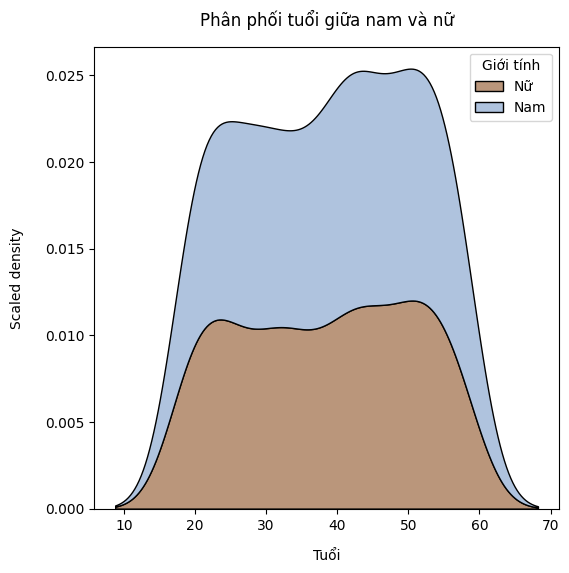

In [10]:
plt.figure(figsize=(6,6))
sns.kdeplot(data=gym_exercise, x = 'Age', hue='Gender', fill=True, common_norm = True, alpha=0.9, palette = [(166/255,189/255,219/255), '#B38B6D'],
            multiple='stack')
plt.title('Phân phối tuổi giữa nam và nữ', pad = 15)
plt.xlabel('Tuổi', labelpad = 12)
plt.ylabel('Scaled density', labelpad = 15)
plt.legend(title='Giới tính', labels=['Nữ', 'Nam'])
plt.show()

Với biểu đồ trên thì ta có thể thấy rằng, nam chiếm nhiều hơn nữ khi xét đến tập gym. Tuy đây là một biểu đồ khó giải thích ban đầu nhưng nó đủ để cho ta thấy và nhấn mạnh rằng nam nhiều hơn nữ ở các nhóm tuổi.

# Weight

In [11]:
gym_exercise['Weight (kg)'].mean()

73.85467625899281

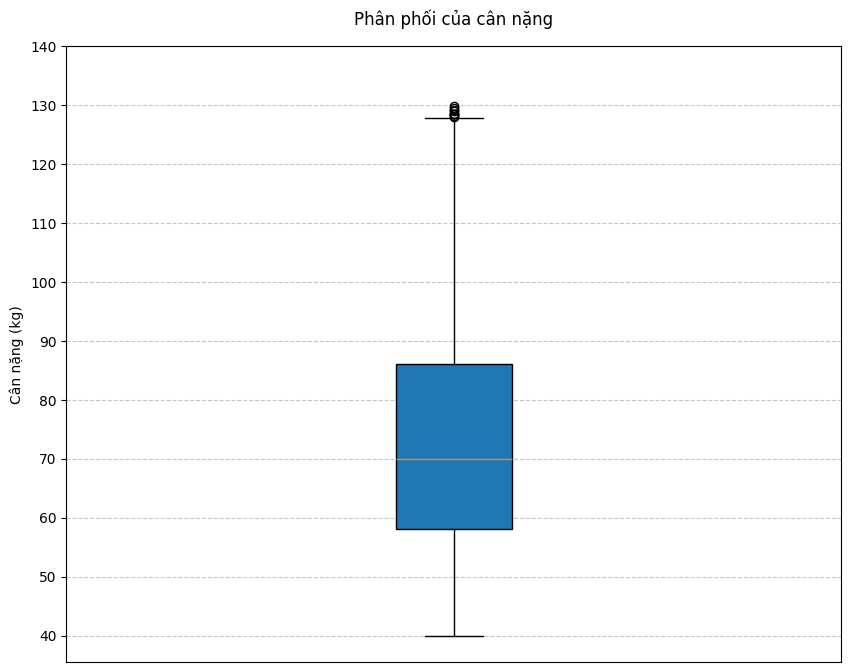

In [12]:
plt.figure(figsize=(10, 8))
plt.boxplot(gym_exercise['Weight (kg)'],  patch_artist = True)
plt.title('Phân phối của cân nặng', pad=15)
plt.ylabel('Cân nặng (kg)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks([])
plt.yticks(np.arange(gym_exercise['Weight (kg)'].min(), gym_exercise['Weight (kg)'].max() + 20, 10))
plt.show()

Cân nặng của những người tập gym trải dài từ 40kg đến khoảng 120kg, với biểu đồ boxplot trên thì có thể thầy tồn tại một số giá trị ngoại lai nhưng khi kiểm tra lại bằng phương pháp 3-sigma thì không tồn tại điểm ngoại lai nào nên có thể nói biến cân nặng không tồn tại điểm ngoại lai, phần râu bắt đầu từ Q3 có phần dài hơn râu ở Q1 trở xuống nên có thể thấy cân nặng phân tán hơn ở khoảng (Q3, Q4). Có lẽ vì thế mà ảnh hưởng đến mean, mean của cân nặng xấp xỉ
73,85 (kg). Vậy những người tập gym sẽ có cân nặng vào khoảng 73.85(kg)

# Height

In [13]:
gym_exercise['Height (m)'].mean()

1.7225796505652622

In [14]:
gym_exercise['Height (m)'].std()

0.12771989460721703

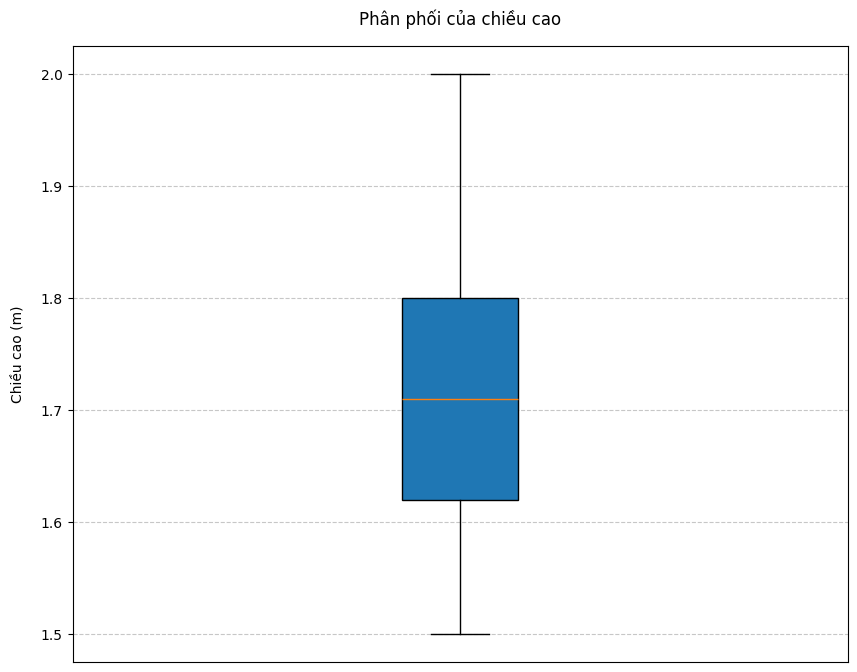

In [15]:
plt.figure(figsize=(10, 8))
plt.boxplot(gym_exercise['Height (m)'],  patch_artist = True)
plt.title('Phân phối của chiều cao', pad=15)
plt.ylabel('Chiều cao (m)', labelpad = 12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks([])
plt.show()

Chiều cao dựa trên boxplot không có các giá trị ngoại lai, hai râu nhìn chung không chênh lệch quá lớn nhưng vẫn có sự khác nhau đáng kể, median dường như ở vị trí "cân bằng" hơn. Xét trên tổng thể, chiều cao phân bổ từ 1.5 (m) cho tới 2.0 (m), chiều cao trung bình là 1.722 (m). Độ lệch chuẩn 0.12787, không quá lớn. Với tất cả những điều này có thể nói rằng chiều cao phân tán không quá rộng.

# Max_BPM, Avg_BPM và Resting_BPM

In [16]:
print('Range của Max_BMP - nhịp tim tối đa khi tập:', gym_exercise['Max_BPM'].max() - gym_exercise['Max_BPM'].min())
print('Range của Avg_BMP - nhịp tim trung bình khi tập:', gym_exercise['Avg_BPM'].max() - gym_exercise['Avg_BPM'].min())
print('Range của Resting_BMP - nhịp tim lúc nghỉ ngơi trước khi tập:', gym_exercise['Resting_BPM'].max() - gym_exercise['Resting_BPM'].min())

Range của Max_BMP - nhịp tim tối đa khi tập: 39
Range của Avg_BMP - nhịp tim trung bình khi tập: 49
Range của Resting_BMP - nhịp tim lúc nghỉ ngơi trước khi tập: 24


In [17]:
print(f'Min & max của Max_BMP - nhịp tim tối đa khi tập: {gym_exercise["Max_BPM"].min()} - {gym_exercise["Max_BPM"].max()}')
print(f'Min & max của Avg_BMP - nhịp tim trung bình khi tập: {gym_exercise["Avg_BPM"].min()} - {gym_exercise["Avg_BPM"].max()}')
print(f'Min & max của Resting_BMP - nhịp tim lúc nghỉ ngơi trước khi tập: {gym_exercise["Resting_BPM"].min()} - {gym_exercise["Resting_BPM"].max()}')


Min & max của Max_BMP - nhịp tim tối đa khi tập: 160 - 199
Min & max của Avg_BMP - nhịp tim trung bình khi tập: 120 - 169
Min & max của Resting_BMP - nhịp tim lúc nghỉ ngơi trước khi tập: 50 - 74


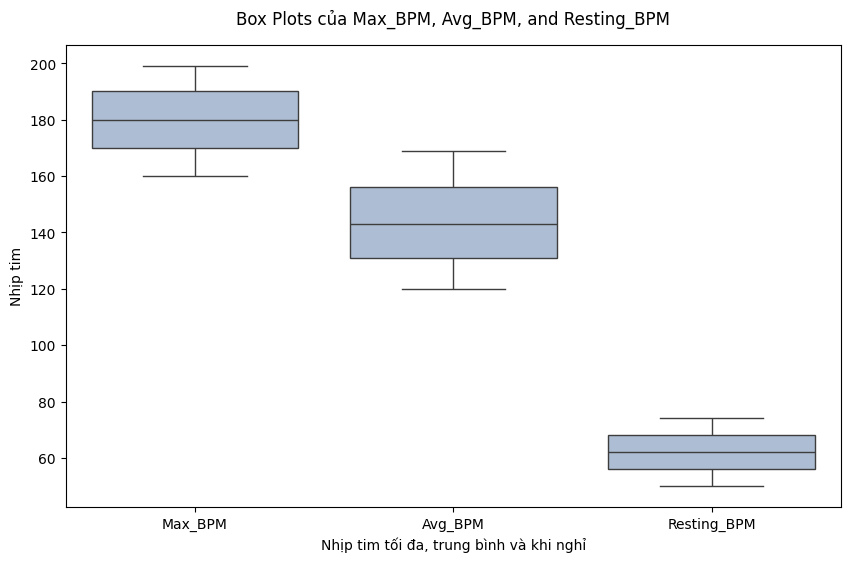

In [18]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.boxplot(data=gym_exercise[['Max_BPM', 'Avg_BPM', 'Resting_BPM']], color = (166/255,189/255,219/255))
plt.title('Box Plots của Max_BPM, Avg_BPM, and Resting_BPM', pad=15)
plt.xlabel('Nhịp tim tối đa, trung bình và khi nghỉ')
plt.ylabel('Nhịp tim')
sns.set_style("whitegrid")
plt.grid(True, linestyle='', alpha=0.9)
plt.show()

# Session_Duration

In [19]:
print('Median của số giờ tập:', gym_exercise['Session_Duration (hours)'].median())
print('Mean của số giờ tập:', round(gym_exercise['Session_Duration (hours)'].mean(), 4))

Median của số giờ tập: 1.26
Mean của số giờ tập: 1.2564


In [20]:
kurtosis(gym_exercise['Session_Duration (hours)'])

-0.35516524554910545

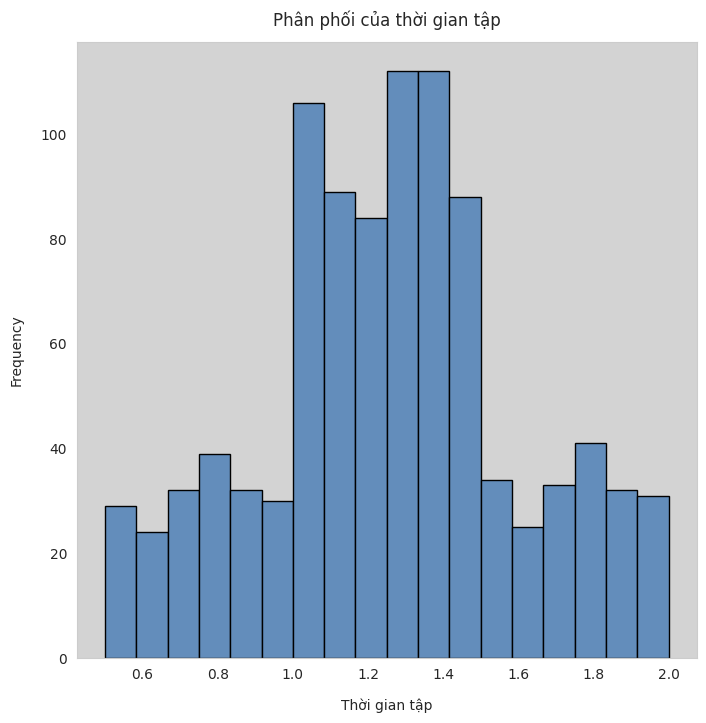

In [21]:
plt.figure(figsize=(8,8))
ax  = plt.gca()
plt.hist(gym_exercise['Session_Duration (hours)'], edgecolor = 'black', bins = 18,  color=(99/255, 141/255, 187/255))
plt.title('Phân phối của thời gian tập', pad = 12)
plt.xlabel('Thời gian tập', labelpad = 12)
plt.ylabel('Frequency', labelpad = 12)
ax.set_facecolor('#D3D3D3')
plt.grid(False)

Mean và median của thời gian tập có chênh lệch nhỏ, không đáng kể cho thấy độ lệch của biến này không quá lớn. Độ lệch không lớn thì dữ liệu sẽ không bị nghiêng về một phía nào và cho thấy một phân phối tiệm cận đối xứng. Giúp tăng tính chính xác của dữ liệu khi sử dụng biến Session_Duration để đưa ra các insights.

Thời gian tập trung bình là 1.25 (giờ). Từ đây ta có thể tìm hiểu thêm thêm thời gian tập giữa nam và nữ ra sao, giữa các nhóm tuổi ra sao.

# Calories_Burned

In [22]:
print('Median của tổng calories đốt cháy khi tập:', gym_exercise['Calories_Burned'].median())
print('Mean của tổng calories đốt cháy khi tập:', round(gym_exercise['Calories_Burned'].mean(),2))

Median của tổng calories đốt cháy khi tập: 893.0
Mean của tổng calories đốt cháy khi tập: 905.42


In [23]:
print('Độ lệch chuẩn của tổng calories đốt cháy khi tập:', round(gym_exercise['Calories_Burned'].std(),2))

Độ lệch chuẩn của tổng calories đốt cháy khi tập: 272.64


In [24]:
kurtosis(gym_exercise['Calories_Burned'])

-0.06192250620394191

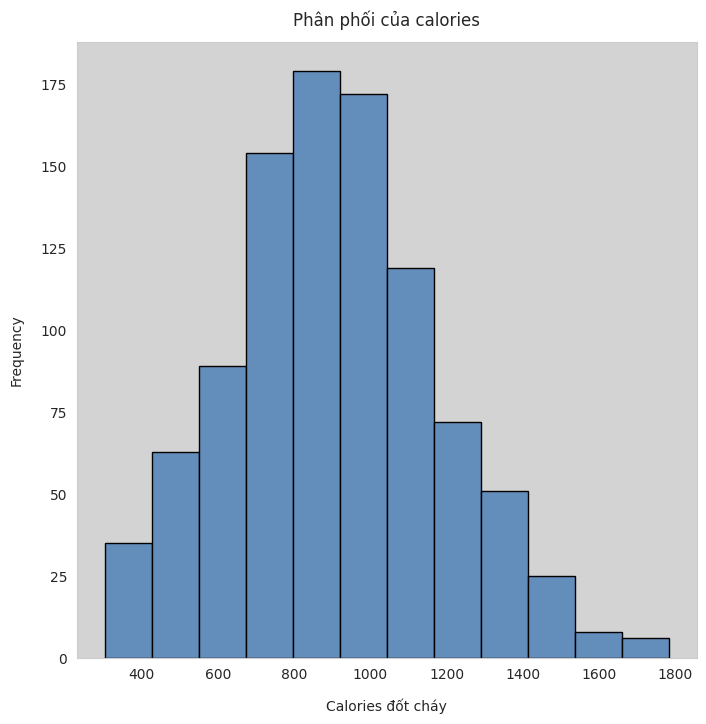

In [25]:
plt.figure(figsize=(8,8))
ax  = plt.gca()
plt.hist(gym_exercise['Calories_Burned'], edgecolor = 'black', bins = 12,  color=(99/255, 141/255, 187/255))
plt.title('Phân phối của calories', pad = 12)
plt.xlabel('Calories đốt cháy', labelpad = 12)
plt.ylabel('Frequency', labelpad = 12)
ax.set_facecolor('#D3D3D3')
plt.grid(False)


Với kết quả trên có thể nói rằng lượng calories đốt cháy khi tập có độ phân tán lớn. Điều này có thể do tác động của số giờ tập, loại hình tập, tần suất tập, kinh nghiệm và lượng nước tiêu thụ khi tập. Hơn nữa, chênh lệch giữa mean và median không lớn, phân phối của Calories_Burned lại xấp xỉ chuẩn. Nên giả thiết liên quan tới Calories_Burned phần nào đáng tin cậy hơn.

# Workout type

In [26]:
print("Mode của loại workout:", gym_exercise['Workout_Type'].mode()[0])

Mode của loại workout: Strength


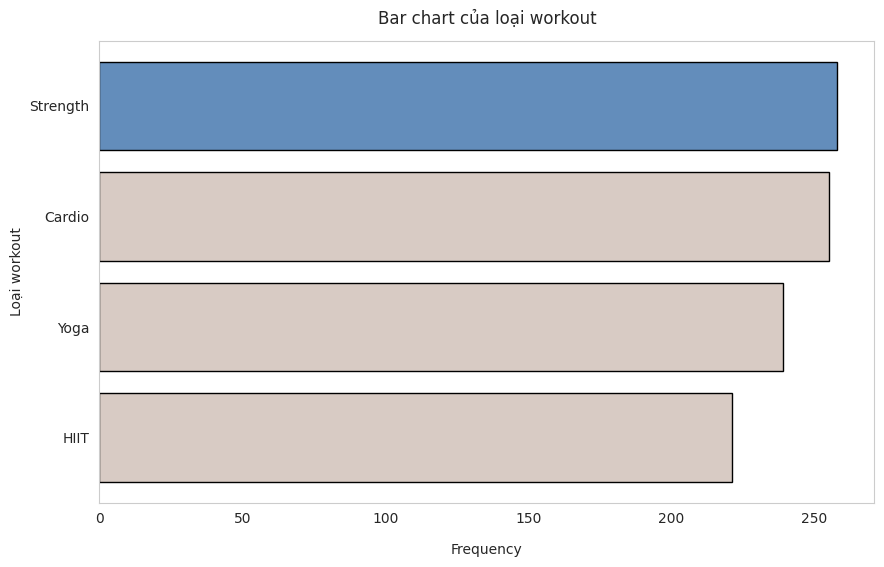

In [27]:
plt.figure(figsize=(10, 6))
workout_counts = gym_exercise['Workout_Type'].value_counts(ascending=True)
plt.barh(workout_counts.index, workout_counts.values, edgecolor='black', color = ['#d8cbc4', '#d8cbc4', '#d8cbc4', (99/255, 141/255, 187/255)])
plt.title('Bar chart của loại workout', pad = 12)
plt.xlabel('Frequency', labelpad = 12)
plt.ylabel('Loại workout')
sns.set_style("white")
plt.grid(False)
plt.show()

Với biểu thanh trên, Strength là loại workout được chọn nhiều nhất tuy vậy Cardio cũng không kém cạnh khi chỉ chênh lệch so với Strength rất nhỏ. Vì vậy có thể dựa vào điều này để phân tích sâu hơn về các khía cạnh calories, thời gian tập, lượng nước,...

# Fat_Percentage

In [28]:
print('Median của tỷ lệ chất béo:', gym_exercise['Fat_Percentage'].median())
print('Mean của tỷ lệ chất béo:', round(gym_exercise['Fat_Percentage'].mean(),2))

Median của tỷ lệ chất béo: 26.2
Mean của tỷ lệ chất béo: 24.98


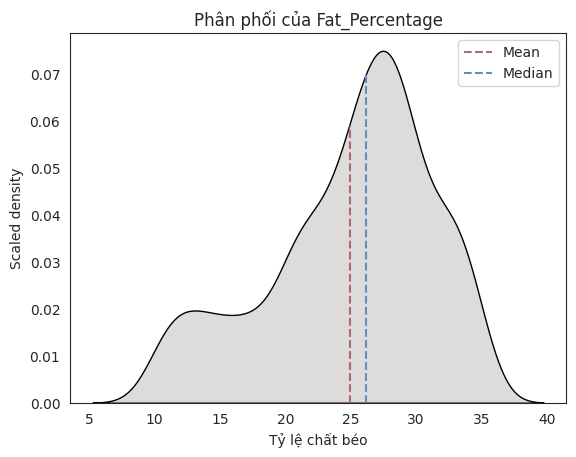

In [29]:
sns.kdeplot(data=gym_exercise, x = 'Fat_Percentage', fill=True, common_norm = True, alpha=0.3, color = (145/255, 142/255, 133/255),
            edgecolor = 'black')
plt.xlabel('Tỷ lệ chất béo')
plt.ylabel('Scaled density')
plt.title('Phân phối của Fat_Percentage')
plt.axvline(gym_exercise['Fat_Percentage'].mean(), color = (177/255,104/255,113/255), linestyle = '--', ymax= 0.75, label = 'Mean')
plt.axvline(gym_exercise['Fat_Percentage'].median(), color = (99/255, 141/255, 187/255), linestyle = '--', ymax= 0.89, label = 'Median')
plt.legend()
plt.show()

Phân phối của tỷ lệ chất báo có vẻ khá lệch. Có thể dự đoán điều này do phần đuôi trái dài hơn đuôi phải, do đó mà các giá trị sẽ tập trung hơn ở phần đuôi trái này (các giá trị nhỏ trong khoảng phân tán của dữ liệu). Tuy nó có thể khiến đánh giá của ta bị thiên vị nhưng nếu khai thác được sâu thì ta có thể tìm ra những người có tỷ lệ chất béo ở khoảng đuôi trái này có những gì đặc biệt trong gym.

# Water_Intake

In [30]:
print('Độ lệch chuẩn của lượng nước tiêu thụ:', round(gym_exercise['Fat_Percentage'].std(),2))
print('Lượng nước tiêu thụ trung bình:', round(gym_exercise['Fat_Percentage'].mean(),2))

Độ lệch chuẩn của lượng nước tiêu thụ: 6.26
Lượng nước tiêu thụ trung bình: 24.98


Phân tán của lượng nước tiêu thụ không quá lớn, lượng nước tiêu thụ trung bình khoảng 24.98 (lít). Tuy độ phân tán không lớn nhưng một số những yếu tố ảnh hưởng đến việc tiêu thụ nước khi tập như thời gian tập, tỷ lệ chất béo, cường độ tập,...

# Experience_level

In [31]:
print("Mode của trình độ tập:", gym_exercise['Experience_Level'].mode()[0])

Mode của trình độ tập: 2


Trình độ ở mức 2, có thể coi đây là mức trung bình. Với mức này có thể đó là
mức phổ thông, mức mà nhiều người đều đạt được. Vậy thì với yếu tố, nó tác động gì đến cường độ tập, sức bền, thói quen tập.

# Workout_Frequency

In [32]:
gym_exercise['Workout_Frequency (days/week)'].unique()

array([4, 3, 5, 2])

In [33]:
print(f"Tần số tập trong tuần phổ biến nhất: {gym_exercise['Workout_Frequency (days/week)'].mode()[0]} (ngày/tuần)")

Tần số tập trong tuần phổ biến nhất: 3 (ngày/tuần)


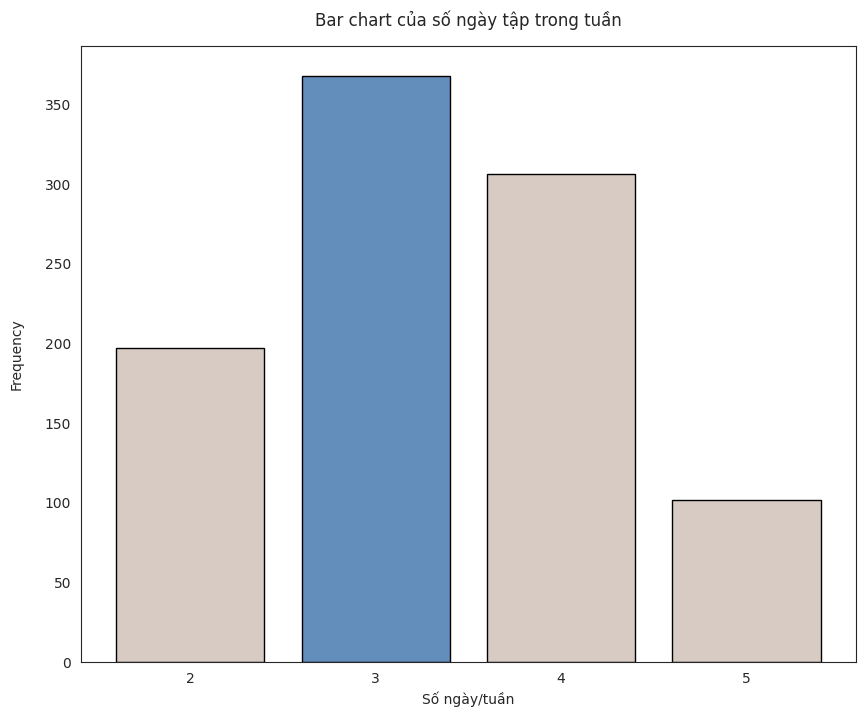

In [34]:
plt.figure(figsize=(10, 8))
workout_freq = gym_exercise['Workout_Frequency (days/week)'].value_counts(ascending=False)
plt.bar(workout_freq.index, workout_freq.values
, edgecolor='black', color = [(99/255, 141/255, 187/255), '#d8cbc4', '#d8cbc4', '#d8cbc4'])
plt.title('Bar chart của số ngày tập trong tuần', pad = 15)
plt.xlabel('Số ngày/tuần')
plt.ylabel('Frequency', labelpad = 15)
plt.xticks(np.arange(2, 6, 1))
plt.show()

Số ngày tập trong tuần nhiều nhất đó là 3 ngày/tuần. Với một tuần 7 ngày thì có thể nói đây là một kết khá phù hợp bởi nếu tập quá nhiều sẽ không tốt, gây ảnh hưởng đến cơ và tập quá ít thì việc tập gym sẽ không phát huy tối đa tác dụng.

# BMI

Chia bin BMI: Thiếu cân (< 18.5), Bình thường (18.5 - 24.9), Thừa cân (24.9 - 30), Béo phì (>= 30)

In [35]:
gym_exercise['BMI_group'] = pd.cut(gym_exercise['BMI'], [0, 18.5, 24.9, 30, np.inf], labels = ['Thiếu cân', 'Bình thường', 'Thừa cân', 'Béo phì'])

In [36]:
print("Mode của nhóm BMI:", gym_exercise['BMI_group'].mode()[0])

Mode của nhóm BMI: Bình thường


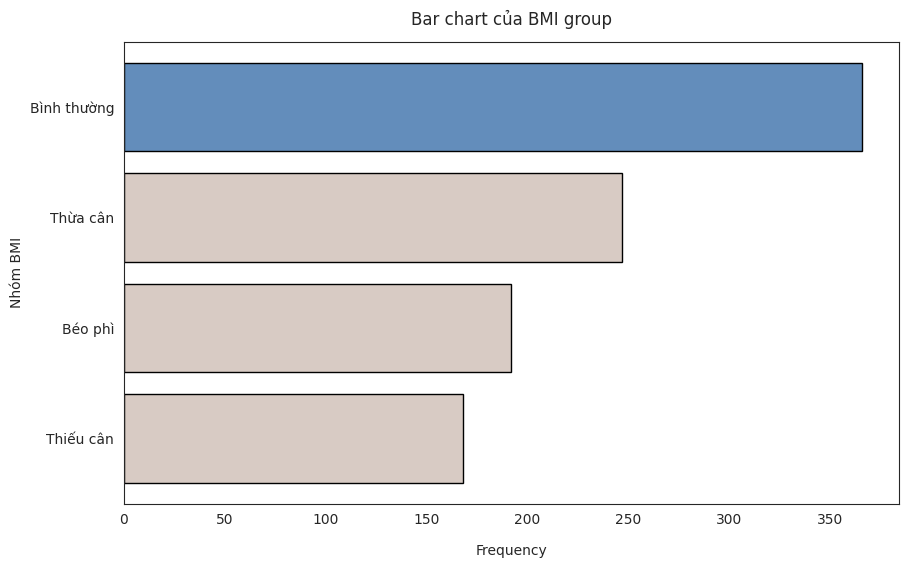

In [37]:
plt.figure(figsize=(10, 6))
bmigroup_counts = gym_exercise['BMI_group'].value_counts(ascending=True)
plt.barh(bmigroup_counts.index, bmigroup_counts.values, edgecolor='black', color = ['#d8cbc4', '#d8cbc4', '#d8cbc4', (99/255, 141/255, 187/255)])
plt.title('Bar chart của BMI group', pad = 12)
plt.xlabel('Frequency', labelpad = 12)
plt.ylabel('Nhóm BMI')
plt.show()

Nhóm người đến tập gym nhiều nhất đó là những người có chỉ số khối cơ thể ở mức bình thường. Những người này đến tập gym có lẽ phần vì muốn duy trì vóc dáng cũng như cải thiện sức khỏe. Vậy những thói quen tập thể dục trong những nhóm này thì có gì mới và thú vị. Các nhóm như thừa cân, béo phì, thiếu cân cũng có thể đem đến cho ta những kiến thức mới về cách tập gym trên các khía cạnh như tần số tập trong tuần, trình độ, lượng nước tiêu thụ ra sao, nhịp tim như thế nào,...

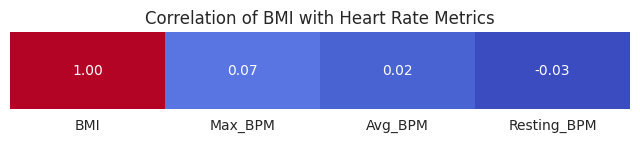

In [38]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['BMI', 'Max_BPM', 'Avg_BPM', 'Resting_BPM']
data_for_correlogram = gym_exercise[selected_columns]

# Calculate correlation matrix
correlation_matrix = data_for_correlogram.corr()

# Extract the first row (correlations of BMI)
first_row_correlations = correlation_matrix.iloc[0,:]  # Select row 0, columns 1 onwards

plt.figure(figsize=(8, 1))  # Adjust figure size for a single row
sns.heatmap(first_row_correlations.to_frame().T, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)  # cbar=False to hide colorbar
plt.title('Correlation of BMI with Heart Rate Metrics')
plt.yticks([])  # Hide y-axis ticks
plt.show()